In [1]:
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, ttest_ind
import numpy as np
from scipy.stats import fisher_exact
import umap
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import random
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

random.seed(12345)

2024-09-21 11:18:49.736529: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-21 11:18:49.741581: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-21 11:18:49.774441: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-21 11:18:49.774463: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-21 11:18:49.775601: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
# Import neighborhood distance matrix from intermediates folder
dists = pd.read_csv("/mnt/isilon/tan_lab/xiongb/tcn/SpaCEOrbit/TNBC-RT/neighborhood_distance_matrix.csv")
dists = dists.set_index("Unnamed: 0")
dists.index.name = None 
dists = dists.apply(lambda x: x/5000)
dists

,h02_T1_R1_210115_Breast_Cassette15_reg1_v5_1,h02_T1_R1_210115_Breast_Cassette15_reg1_v5_10,h02_T1_R1_210115_Breast_Cassette15_reg1_v5_2,h02_T1_R1_210115_Breast_Cassette15_reg1_v5_3,h02_T1_R1_210115_Breast_Cassette15_reg1_v5_4,h02_T1_R1_210115_Breast_Cassette15_reg1_v5_5,h02_T1_R1_210115_Breast_Cassette15_reg1_v5_6,h02_T1_R1_210115_Breast_Cassette15_reg1_v5_7,h02_T1_R1_210115_Breast_Cassette15_reg1_v5_8,h02_T1_R1_210115_Breast_Cassette15_reg1_v5_9,...,h63_T1_R2_210729_PembroRT_Cas35_TLSpanel_reg1_v5_9,h64_T1_NR_210729_PembroRT_Cas35_TLSpanel_reg2_v5_1,h64_T1_NR_210729_PembroRT_Cas35_TLSpanel_reg2_v5_2,h64_T1_NR_210729_PembroRT_Cas35_TLSpanel_reg2_v5_3,h64_T1_NR_210729_PembroRT_Cas35_TLSpanel_reg2_v5_4,h64_T1_NR_210729_PembroRT_Cas35_TLSpanel_reg2_v5_5,h64_T1_NR_210729_PembroRT_Cas35_TLSpanel_reg2_v5_6,h64_T1_NR_210729_PembroRT_Cas35_TLSpanel_reg2_v5_7,h64_T1_NR_210729_PembroRT_Cas35_TLSpanel_reg2_v5_8,h64_T1_NR_210729_PembroRT_Cas35_TLSpanel_reg2_v5_9
h02_T1_R1_210115_Breast_Cassette15_reg1_v5_1,0.0000,8.7268,19.6576,9.0338,17.7080,18.3448,15.3788,15.4718,14.0222,17.8780,...,16.0130,15.8532,18.4298,14.8442,17.1938,14.7084,12.0922,21.1062,17.7678,14.5730
h02_T1_R1_210115_Breast_Cassette15_reg1_v5_10,8.7268,0.0000,15.7416,7.0746,13.4220,16.4780,12.3164,9.4470,8.1574,16.2344,...,14.0074,14.0548,13.4782,11.9490,13.9626,10.9520,8.4678,15.8346,11.7002,9.6010
h02_T1_R1_210115_Breast_Cassette15_reg1_v5_2,19.6576,15.7416,0.0000,17.7626,14.1252,20.8000,9.6188,14.9970,10.4842,9.0188,...,13.6322,20.0820,16.5718,14.5738,19.0282,14.5668,14.1706,24.0286,14.2818,17.7218
h02_T1_R1_210115_Breast_Cassette15_reg1_v5_3,9.0338,7.0746,17.7626,0.0000,12.6530,13.2946,12.2846,9.4620,12.5796,17.5778,...,13.0836,15.9666,14.7312,12.8684,12.1556,10.7594,10.2244,15.7160,13.4428,10.7112
h02_T1_R1_210115_Breast_Cassette15_reg1_v5_4,17.7080,13.4220,14.1252,12.6530,0.0000,14.3408,16.6500,9.5830,13.2034,17.5164,...,16.4098,14.7388,7.8066,15.7766,15.5398,10.3080,15.2458,17.0986,11.3186,15.8526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
h64_T1_NR_210729_PembroRT_Cas35_TLSpanel_reg2_v5_5,14.7084,10.9520,14.5668,10.7594,10.3080,15.8440,12.8344,12.1638,12.1478,16.0536,...,11.8562,11.9772,8.4406,9.8162,11.6470,0.0000,9.3970,17.6690,9.0422,11.9282
h64_T1_NR_210729_PembroRT_Cas35_TLSpanel_reg2_v5_6,12.0922,8.4678,14.1706,10.2244,15.2458,17.1154,12.8830,14.2272,12.1728,15.0014,...,13.6416,8.8158,10.7320,5.1596,11.4260,9.3970,0.0000,17.9564,9.8740,7.2280
h64_T1_NR_210729_PembroRT_Cas35_TLSpanel_reg2_v5_7,21.1062,15.8346,24.0286,15.7160,17.0986,16.8722,22.4950,11.4428,19.0872,25.6522,...,21.2476,22.9406,17.4328,19.6456,15.1608,17.6690,17.9564,0.0000,16.1600,16.0700
h64_T1_NR_210729_PembroRT_Cas35_TLSpanel_reg2_v5_8,17.7678,11.7002,14.2818,13.4428,11.3186,15.1326,15.7386,11.0596,12.5048,16.8254,...,12.0236,13.2794,7.8992,8.3064,10.5608,9.0422,9.8740,16.1600,0.0000,7.8560


In [3]:
# Set up umapDF metadata
umapDF = pd.DataFrame({"full":dists.columns})
umapDF["patient"] = [i.split("_")[0] for i in dists.columns]
umapDF["phase"] = [i.split("_")[1] for i in dists.columns]
umapDF["response"] = [i.split("_")[1] for i in dists.columns]
umapDF["response"] = [i.split("_")[2] for i in dists.columns]
umapDF["neighborhood"] = [i.split("_")[-1] for i in dists.columns]
umapDF["response_phase"] = umapDF["response"] + "_" + umapDF["phase"]
umapDF

,full,patient,phase,response,neighborhood,response_phase
0,h02_T1_R1_210115_Breast_Cassette15_reg1_v5_1,h02,T1,R1,1,R1_T1
1,h02_T1_R1_210115_Breast_Cassette15_reg1_v5_10,h02,T1,R1,10,R1_T1
2,h02_T1_R1_210115_Breast_Cassette15_reg1_v5_2,h02,T1,R1,2,R1_T1
3,h02_T1_R1_210115_Breast_Cassette15_reg1_v5_3,h02,T1,R1,3,R1_T1
4,h02_T1_R1_210115_Breast_Cassette15_reg1_v5_4,h02,T1,R1,4,R1_T1
...,...,...,...,...,...,...
624,h64_T1_NR_210729_PembroRT_Cas35_TLSpanel_reg2_...,h64,T1,NR,5,NR_T1
625,h64_T1_NR_210729_PembroRT_Cas35_TLSpanel_reg2_...,h64,T1,NR,6,NR_T1
626,h64_T1_NR_210729_PembroRT_Cas35_TLSpanel_reg2_...,h64,T1,NR,7,NR_T1
627,h64_T1_NR_210729_PembroRT_Cas35_TLSpanel_reg2_...,h64,T1,NR,8,NR_T1


In [4]:
# UMAP dimension reduction of distance matrix
reducer = umap.UMAP(metric = "precomputed", random_state=0)
reduced = reducer.fit_transform(dists.values)
umapDF["UMAP 1"] = reduced[:,0]
umapDF["UMAP 2"] = reduced[:,1]

/home/xiongb/.local/lib/python3.10/site-packages/umap/umap_.py:1857: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/home/xiongb/.local/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [5]:
# Visualize UMAP
fig = px.scatter(umapDF.sort_values("response"), "UMAP 1", "UMAP 2", color = "phase")
fig.write_html("TNBC_RT_UMAP.html")

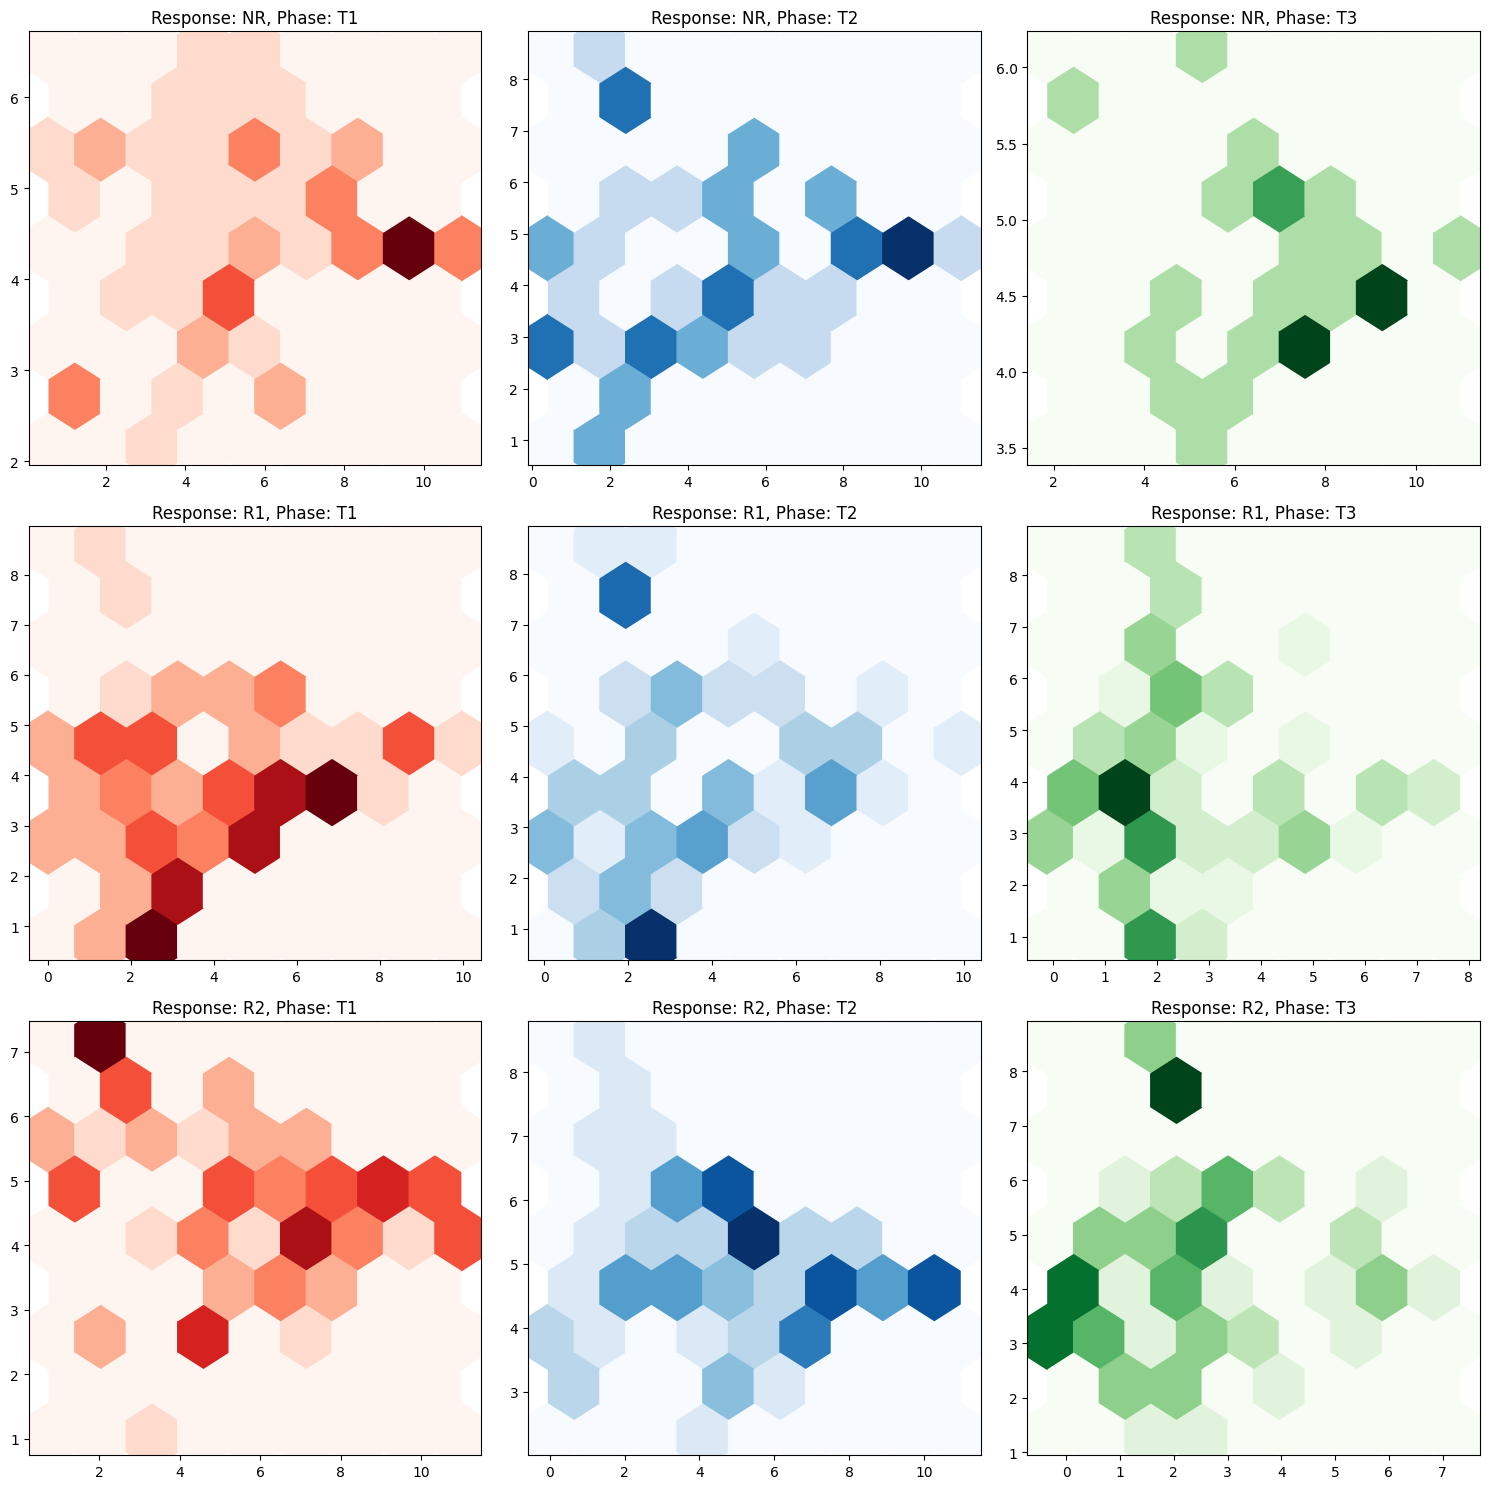

In [6]:
# Hexbin plot by response and phase
cmaps = ["Reds", "Blues", "Greens"]
responses = sorted(umapDF['response'].unique())
phases = sorted(umapDF['phase'].unique())
fig, axes = plt.subplots(len(responses), len(phases), figsize=(15, 15))

for row_idx, response in enumerate(responses):
    for col_idx, phase in enumerate(phases):
        subset = umapDF[umapDF['response_phase'] == response + "_" + phase]
        axes[row_idx, col_idx].hexbin(subset['UMAP 1'], subset['UMAP 2'], gridsize=8, cmap=cmaps[col_idx], alpha=1, label=phase)
        axes[row_idx, col_idx].set_title(f'Response: {response}, Phase: {phase}')

plt.tight_layout()
plt.show()

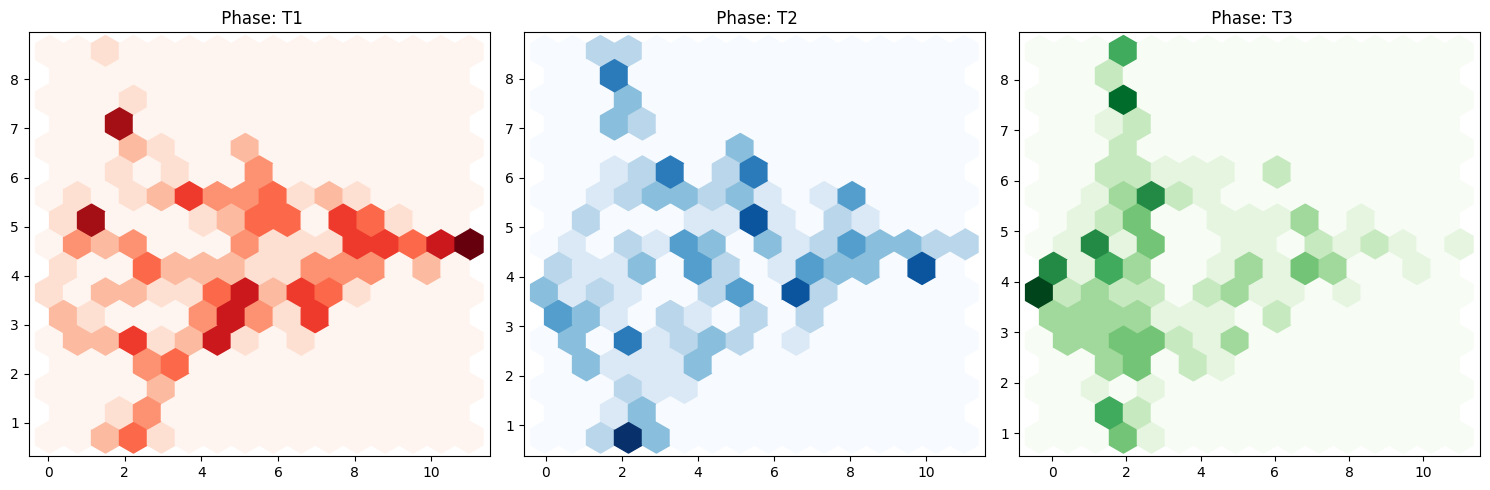

In [7]:
# Hexbin plot by phase
fig, axes = plt.subplots(1, len(phases), figsize=(15, 5))

for col_idx, phase in enumerate(phases):
        subset = umapDF[umapDF['phase'] == phase]
        axes[col_idx].hexbin(subset['UMAP 1'], subset['UMAP 2'], gridsize=15, cmap=cmaps[col_idx], label=phase)
        axes[col_idx].set_title(f' Phase: {phase}')

plt.tight_layout()
plt.show()

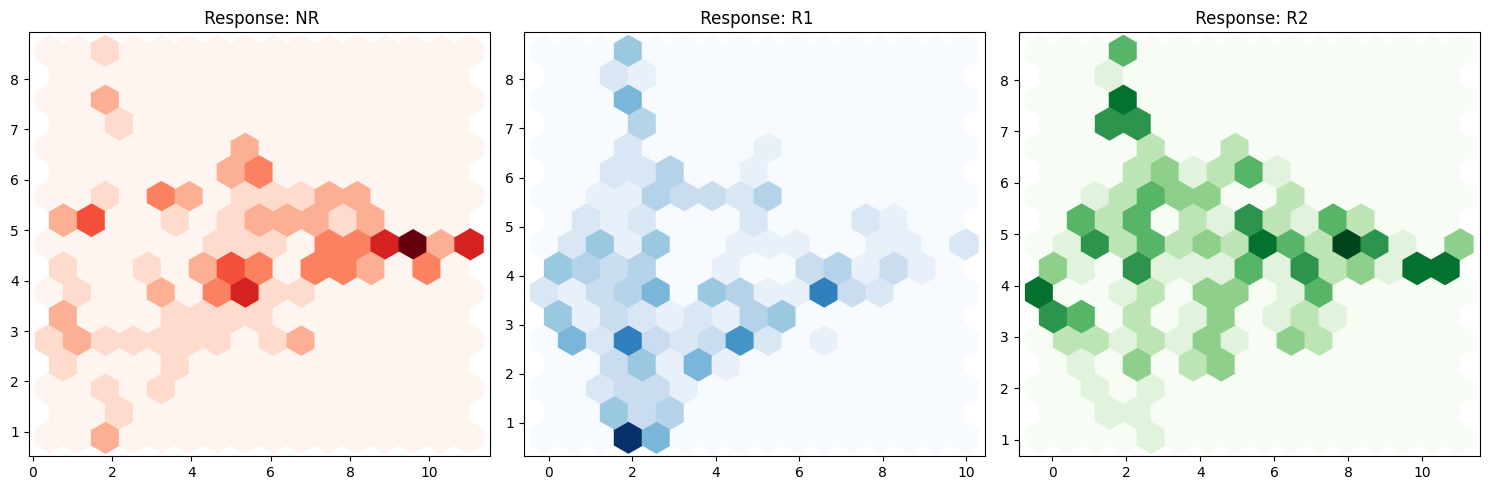

In [8]:
# Hexbin plot by response
fig, axes = plt.subplots(1, len(responses), figsize=(15, 5))

for col_idx, response in enumerate(responses):
        subset = umapDF[umapDF['response'] == response]
        axes[col_idx].hexbin(subset['UMAP 1'], subset['UMAP 2'], gridsize=15, cmap=cmaps[col_idx], label=phase)
        axes[col_idx].set_title(f' Response: {response}')

plt.tight_layout()
plt.show()

In [9]:
# PCA reduction and set up for SVM inputs

feat = 50
pca = PCA(n_components=feat, random_state=0)

matrix_transformed = pca.fit_transform(dists.values)
neighborhood_latent = pd.DataFrame(matrix_transformed, index = dists.index)
neighborhood_latent["phase"] = [i.split("_")[1] for i in neighborhood_latent.index]
dummies = pd.get_dummies(neighborhood_latent["phase"])
neighborhood_latent["T1"] = dummies["T1"].astype(int)
neighborhood_latent["T2"] = dummies["T2"].astype(int)
neighborhood_latent["T3"] = dummies["T3"].astype(int)

neighborhood_latent["patient"] = [i.split("_")[0] for i in neighborhood_latent.index]
neighborhood_latent["image"] = ["_".join(i.split("_")[:-1]) for i in neighborhood_latent.index]
neighborhood_latent["response"] = [i.split("_")[2] for i in neighborhood_latent.index]
neighborhood_latent["response_bin"] = [int(i.split("_")[2]!="NR") for i in neighborhood_latent.index]

neighborhood_latent.columns = neighborhood_latent.columns.astype(str)

In [10]:
# SVM classifier for treatment outcome

columns = list(neighborhood_latent.columns[:feat])+list(neighborhood_latent.columns[[feat + 1, feat + 2, feat + 3]])
cv = KFold(n_splits=15, shuffle=True, random_state=0)

scaler = StandardScaler()
scaled = scaler.fit_transform(neighborhood_latent[columns])
scaled[:,-1] *= 2
scaled[:,-2] *= 2
scaled[:,-3] *= 2


clf = SVC(C=25, kernel="rbf", class_weight="balanced", random_state=42)
predictions = cross_val_predict(clf, scaled, neighborhood_latent["response"], cv=cv)
print(np.std(cross_val_score(clf, scaled, neighborhood_latent["response"], cv=cv)))
print(np.std(cross_val_score(clf, scaled, neighborhood_latent["response"], cv=cv, scoring = "f1_macro")))

results = pd.DataFrame({"Predictions":predictions, "Actual": neighborhood_latent["response"]})
results["Correct"] = (results["Predictions"] == results["Actual"]).astype(int)
results["Phase"] = neighborhood_latent["phase"]
results

0.058105474935891396
0.059369750126001396


,Predictions,Actual,Correct,Phase
h02_T1_R1_210115_Breast_Cassette15_reg1_v5_1,R1,R1,1,T1
h02_T1_R1_210115_Breast_Cassette15_reg1_v5_10,R1,R1,1,T1
h02_T1_R1_210115_Breast_Cassette15_reg1_v5_2,R1,R1,1,T1
h02_T1_R1_210115_Breast_Cassette15_reg1_v5_3,R1,R1,1,T1
h02_T1_R1_210115_Breast_Cassette15_reg1_v5_4,R1,R1,1,T1
...,...,...,...,...
h64_T1_NR_210729_PembroRT_Cas35_TLSpanel_reg2_v5_5,NR,NR,1,T1
h64_T1_NR_210729_PembroRT_Cas35_TLSpanel_reg2_v5_6,NR,NR,1,T1
h64_T1_NR_210729_PembroRT_Cas35_TLSpanel_reg2_v5_7,R2,NR,0,T1
h64_T1_NR_210729_PembroRT_Cas35_TLSpanel_reg2_v5_8,NR,NR,1,T1


In [11]:
# Accuracy by treatment phase
print(results.groupby(['Phase'])["Correct"].mean())
print(np.mean(results["Correct"]))

Phase
T1    0.718062
T2    0.660377
T3    0.778947
Name: Correct, dtype: float64
0.7170111287758346


In [12]:
# F1 score by treatment phase

from sklearn.metrics import f1_score

t1 = results[results["Phase"] == "T1"]
t2 = results[results["Phase"] == "T2"]
t3 = results[results["Phase"] == "T3"]


print(f1_score(results["Actual"], results["Predictions"], average='macro'))
print("T1", f1_score(t1["Actual"], t1["Predictions"], average='macro'))
print("T2", f1_score(t2["Actual"], t2["Predictions"], average='macro'))
print("T3", f1_score(t3["Actual"], t3["Predictions"], average='macro'))


0.6913419717847095
T1 0.7017802826981572
T2 0.63065709611636
T3 0.760781647402483


In [13]:
# Ensembled accuracy and F1 by treatment phase

results["patient"] = neighborhood_latent["patient"]
results["phase"] = neighborhood_latent["phase"]

votes = results.groupby(["patient"])[["Predictions","Actual"]].agg(pd.Series.mode)
correct = []
for index, row in votes.iterrows():
    if str(row["Predictions"]) == str(row["Actual"]):
        correct.append(1)
    elif row["Actual"] in row["Predictions"]:
        correct.append(0.5)
        votes.at[index,"Predictions"] = random.choice(row["Predictions"])
    else:
        correct.append(0)
votes["correct"] = correct
print("Overall accuracy " + str(np.mean(correct)))
print("Overall f1 " + str(f1_score(votes["Actual"], votes["Predictions"], average="macro")))

results_b = results[results["phase"]=="T1"]
votes = results_b.groupby(["patient"])[["Predictions","Actual"]].agg(pd.Series.mode)
correct = []
for index, row in votes.iterrows():
    if str(row["Predictions"]) == str(row["Actual"]):
        correct.append(1)
    elif row["Actual"] in row["Predictions"]:
        correct.append(0.5)
        votes.at[index,"Predictions"] = random.choice(row["Predictions"])
    else:
        correct.append(0)
votes["correct"] = correct
print("T1 accuracy " + str(np.mean(correct)))
print("T1 f1 " + str(f1_score(votes["Actual"], votes["Predictions"], average="macro")))

results_bo = results[results["phase"].isin(["T1","T2"])]
votes = results_bo.groupby(["patient"])[["Predictions","Actual"]].agg(pd.Series.mode)
correct = []
for index, row in votes.iterrows():
    if str(row["Predictions"]) == str(row["Actual"]):
        correct.append(1)
    elif row["Actual"] in row["Predictions"]:
        correct.append(0.5)
        votes.at[index,"Predictions"] = random.choice(row["Predictions"])
    else:
        correct.append(0)
votes["correct"] = correct
np.mean(correct)
print("T1 + T2 accuracy " + str(np.mean(correct)))
print("T1 + T2 f1 " + str(f1_score(votes["Actual"], votes["Predictions"], average="macro")))


Overall accuracy 0.8571428571428571
Overall f1 0.8451540616246498
T1 accuracy 0.8269230769230769
T1 f1 0.8375350140056023
T1 + T2 accuracy 0.8571428571428571
T1 + T2 f1 0.8451540616246498


## Feature selection

In [14]:
# List of T1 neighborhoods
t1 = list(neighborhood_latent.reset_index()[neighborhood_latent.reset_index()["phase"].isin(["T1"])].index)

In [45]:
# Feature selection with RFE using permutation_importance

from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import numpy as np

scaler = StandardScaler()
scaled = scaler.fit_transform(neighborhood_latent[columns])
scaled[:,-1] *= 2
scaled[:,-2] *= 2
scaled[:,-3] *= 2

# Initialize the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', random_state=42, class_weight="balanced")

# Perform RFE with permutation importance
num_features_to_select = 1  # Set the number of features you want to select
current_features = list(range(scaled.shape[1]))

while len(current_features) > num_features_to_select:
    # Fit the model on the current set of features
    svm_model.fit(scaled[:, current_features], neighborhood_latent["response"])
    
    # Compute permutation importance
    perm_importance = permutation_importance(svm_model, scaled[t1,:][:,current_features], neighborhood_latent.iloc[t1]["response"], n_repeats=10, random_state=42)
    
    # Identify the least important feature
    least_important_feature_idx = np.argmin(perm_importance.importances_mean)

    # Remove the least important feature from the list
    del current_features[least_important_feature_idx]
    
    print(f"Remaining features: {current_features}")

# Final model evaluation
svm_model.fit(scaled, neighborhood_latent["response"])
print(f"Final selected features: {current_features}")

Remaining features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
Remaining features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
Remaining features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52]
Remaining features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52]
Remaining features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 3

In [46]:
# Find loadings of each PCA component
pca = PCA(n_components=50)
pca.fit(dists.values)

# Loadings
loading_matrix = pca.components_.T

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

# Square the loadings
squared_loadings = loading_matrix ** 2

# Normalize to get the percent contribution
percent_contribution = squared_loadings / np.sum(squared_loadings, axis=0)

[4.67383062e-01 2.49358394e-01 1.67053997e-01 4.59707907e-02
 2.16535750e-02 1.11163502e-02 6.55045244e-03 4.66235002e-03
 3.45592232e-03 3.13936045e-03 2.33652604e-03 2.06969038e-03
 1.67657686e-03 1.53005910e-03 1.17536483e-03 1.13419710e-03
 9.21016023e-04 8.53106458e-04 6.93232418e-04 5.77219246e-04
 4.95685019e-04 4.00694852e-04 3.73064356e-04 3.66535703e-04
 2.91715042e-04 2.87455078e-04 2.68895417e-04 2.35864354e-04
 2.15867394e-04 1.91178819e-04 1.80687309e-04 1.62198792e-04
 1.40180180e-04 1.25180381e-04 1.17752907e-04 1.12383426e-04
 1.08187937e-04 9.72055735e-05 8.87327120e-05 8.42227969e-05
 8.13184919e-05 7.20898569e-05 6.98583803e-05 6.31950870e-05
 5.88217380e-05 5.42245483e-05 5.16775974e-05 5.00839975e-05
 4.91827887e-05 4.66659531e-05]


(array([36., 28., 47., 36., 37., 37., 62., 44., 47., 47., 34., 26., 16.,
        21., 21., 25., 15., 15.,  7.,  6.,  3.,  6.,  3.,  3.,  2.,  1.,
         1.,  1.,  1.,  1.]),
 array([1.53368838e-06, 1.88628875e-04, 3.75724061e-04, 5.62819247e-04,
        7.49914434e-04, 9.37009620e-04, 1.12410481e-03, 1.31119999e-03,
        1.49829518e-03, 1.68539037e-03, 1.87248555e-03, 2.05958074e-03,
        2.24667592e-03, 2.43377111e-03, 2.62086630e-03, 2.80796148e-03,
        2.99505667e-03, 3.18215186e-03, 3.36924704e-03, 3.55634223e-03,
        3.74343741e-03, 3.93053260e-03, 4.11762779e-03, 4.30472297e-03,
        4.49181816e-03, 4.67891335e-03, 4.86600853e-03, 5.05310372e-03,
        5.24019891e-03, 5.42729409e-03, 5.61438928e-03]),
 <BarContainer object of 30 artists>)

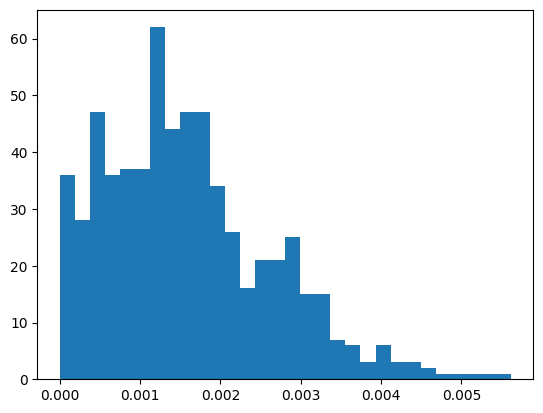

In [47]:
# Get contributions of each feature to most predictive PCA components
top_features_contribution = np.sum(percent_contribution[:,[0, 2]],axis=1)
top_features_contribution/=np.sum(top_features_contribution)
plt.hist(top_features_contribution/np.sum(top_features_contribution),bins=30)

In [48]:
# Filter neighborhoods to top contributors
top_features_contribution[top_features_contribution > 0.0023] = 1
top_features_contribution[top_features_contribution < 0.0023] = 0
np.sum(top_features_contribution)

<Axes: xlabel='UMAP 1', ylabel='UMAP 2'>

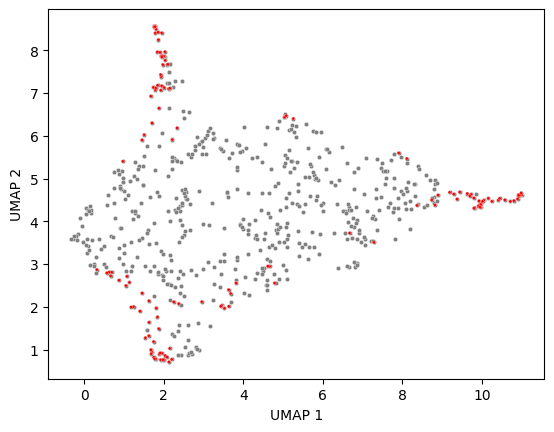

In [50]:
# Show top neighborhoods on UMAP
umapDF["contribution"] = top_features_contribution
sns.scatterplot(umapDF, x="UMAP 1", y = "UMAP 2",s=10,c='grey')
sns.scatterplot(umapDF, x="UMAP 1", y = "UMAP 2", alpha=umapDF["contribution"],s=5,c='red')

In [60]:
# Cluster top contributing neighborhoods

from sklearn.cluster import HDBSCAN
clustering = HDBSCAN(min_cluster_size=15, metric="euclidean").fit(dist_contributed)
dist_contributed["cluster"] = clustering.labels_
print(set(clustering.labels_))
umapDF2 = umapDF.merge(dist_contributed[["cluster"]],left_on="full",right_index=True,how="outer")

{0, 1, 2, -1}


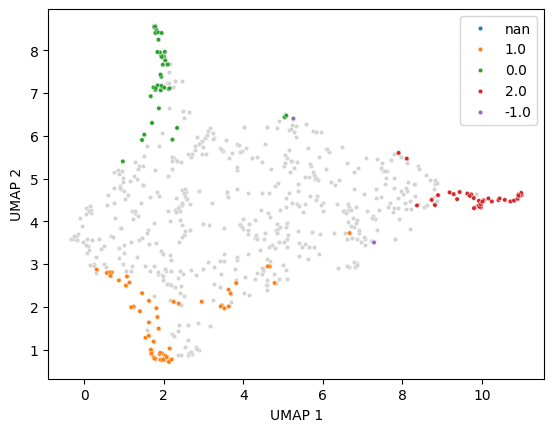

In [61]:
# Show clusters on UMAP

umapDF2["cluster"] = umapDF2["cluster"].astype(str)
sns.scatterplot(umapDF2, x="UMAP 1", y = "UMAP 2",s=10,c='lightgrey')
sns.scatterplot(umapDF2[umapDF2["cluster"]!="nan"], x="UMAP 1", y = "UMAP 2", hue=umapDF2["cluster"],s=10)
plt.legend()

In [62]:
# Record cluster assignments
umapDF2["NR cluster"] = [int(i=="2.0") for i in list(umapDF2["cluster"]) ]
umapDF2["R cluster 1"] = [int(i=="1.0") for i in list(umapDF2["cluster"]) ]
umapDF2["R cluster 2"] = [int(i=="0.0") for i in list(umapDF2["cluster"]) ]
umapDF2["response_bin"] = [i!="NR" for i in umapDF2['response']]
umapDF2.to_csv("TNBC-RT_predictive_clusters.csv")

In [64]:
# Enrichment test for R1 cluster
tt = len(umapDF2[(umapDF2["R cluster 1"]) & (umapDF2["response"]=="R1") ])
tf = len(umapDF2[(umapDF2["R cluster 1"]) & (umapDF2["response"]!="R1") ])
ft = len(umapDF2[(~umapDF2["R cluster 1"]) & (umapDF2["response"]=="R1")])
ff = len(umapDF2[(~umapDF2["R cluster 1"]) & (umapDF2["response"]!="R1")])

print([[tt,tf],[ft,ff]])
res = fisher_exact([[tt,tf],[ft,ff]], alternative='greater')
print(res.pvalue)

[[42, 11], [222, 354]]
8.631597913206486e-09


In [65]:
# Enrichment test for R1/R2-T3 cluster

tt = len(umapDF2[(umapDF2["R cluster 2"]) & (umapDF2["response_bin"]==1)])
tf = len(umapDF2[(umapDF2["R cluster 2"]) & (umapDF2["response_bin"]!=1)])
ft = len(umapDF2[(~umapDF2["R cluster 2"]) & (umapDF2["response_bin"]==1)])
ff = len(umapDF2[(~umapDF2["R cluster 2"]) & (umapDF2["response_bin"]!=1)])

print([[tt,tf],[ft,ff]])
res = fisher_exact([[tt,tf],[ft,ff]], alternative='greater')
print(res.pvalue)

[[41, 3], [460, 125]]
0.010984133118166421


In [66]:
# Enrichment test for NR cluster

tt = len(umapDF2[(umapDF2["NR cluster"]) & (umapDF2["response_bin"]==0)])
tf = len(umapDF2[(umapDF2["NR cluster"]) & (umapDF2["response_bin"]!=0)])
ft = len(umapDF2[(~umapDF2["NR cluster"]) & (umapDF2["response_bin"]==0)])
ff = len(umapDF2[(~umapDF2["NR cluster"]) & (umapDF2["response_bin"]!=0)])

print([[tt,tf],[ft,ff]])
res = fisher_exact([[tt,tf],[ft,ff]], alternative='greater')
print(res.pvalue)

[[19, 22], [109, 479]]
9.182683374311187e-05


In [70]:
# Import and compile neighborhood vectors
import glob
vs = []
for f in glob.glob("/mnt/isilon/tan_lab/xiongb/tcn/SpaCEOrbit/TNBC-RT/neighborhood_vectors/*.csv"):
    v = pd.read_csv(f)
    v = v.set_index("Unnamed: 0")
    v["neighborhood"] = f.split("/")[-1].strip(".csv")
    vs.append(v)
vectors = pd.concat(vs)
vectors = vectors.set_index("neighborhood")

In [71]:
# Save neighborhood vectors for each enriched neighborhood cluster

rd_vectors = vectors.loc[list(umapDF2[umapDF2["NR cluster"]==1]["full"])]
rd_vectors[rd_vectors.columns[:18]]/=10
rd_vectors[rd_vectors.columns[:18]] = rd_vectors[rd_vectors.columns[:18]].astype(int)
rd_vectors.to_csv("NR_vectors_predicted.csv")

pcr_vectors1 = vectors.loc[list(umapDF2[umapDF2["R cluster 1"]==1]["full"])]
pcr_vectors1[pcr_vectors1.columns[:18]]/=10
pcr_vectors1[pcr_vectors1.columns[:18]] = pcr_vectors1[pcr_vectors1.columns[:18]].astype(int)
pcr_vectors1.to_csv("r1_vectors_predicted.csv")

pcr_vectors2 = vectors.loc[list(umapDF2[umapDF2["R cluster 2"]==1]["full"])]
pcr_vectors2[pcr_vectors2.columns[:18]]/=10
pcr_vectors2[pcr_vectors2.columns[:18]] = pcr_vectors2[pcr_vectors2.columns[:18]].astype(int)
pcr_vectors2.to_csv("r1r2_vectors_predicted.csv")